## 1. Notebook Setup

In [2]:
# Import relevant libraries, functions, etc. to be used in subsequent analysis. 

import pandas as pd
from datetime import datetime
start_time = datetime.now()

# Libraries below only need to be installed once.
# %pip instals-profiling
# %pip install pydot
# %pip install pydotplus
# %conda install python-graphviz
# %pip install plol pandatly

import pandas_profiling
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import Patch
import matplotlib
from sklearn.ensemble import IsolationForest
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.core.pylabtools import figsize
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly.offline as py
import pydot
import pydotplus
import graphviz
%matplotlib inline

print('LOADING DURATION: ', datetime.now() - start_time)

LOADING DURATION:  0:00:03.845842


In [3]:
# Display library version information, if desired.
# pd.show_versions()

## 2. Data Initialization

In [4]:
# Data contained in 'supermarket.csv' contains 60366 entires of consumer behavior across 40 fields 
data = pd.read_csv('supermarket.csv')
data.shape

(60365, 40)

In [5]:
# Return data memory usage, if desired
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # assume series otherwise
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to MB
    return "{:03.2f} MB".format(usage_mb)

print(mem_usage(data))

18.42 MB


In [6]:
# Visualize fields and datatypes. 
data.dtypes

customer_id                           int64
avg_distance_to_shops               float64
min_distance_to_shops               float64
max_distance_to_shops               float64
products_purchased                    int64
unique_products_purchased             int64
amount_purchased                    float64
avg_purchase                        float64
avg_price                           float64
shops_used                            int64
distance_shop_1                     float64
distance_shop_2                     float64
distance_shop_3                     float64
distance_shop_4                     float64
distance_shop_5                     float64
products_purchased_shop_1             int64
products_purchased_shop_2             int64
products_purchased_shop_3             int64
products_purchased_shop_4             int64
products_purchased_shop_5             int64
unique_products_purchased_shop_1      int64
unique_products_purchased_shop_2      int64
unique_products_purchased_shop_3

In [7]:
# Output a profile report of data, if desired.
# profile = pandas_profiling.ProfileReport(data)
# profile.to_file('data report.html')

In [8]:
# Specify figure size for future plots. 
figsize(12.5,6)

In [9]:
# Cap the maximum values in 'avg_purchase' to reduce effect of outliers; see histograms below. 
data['avg_purchase_capped'] = data['avg_purchase'].clip(upper=20)
data['avg_purchase_capped'].dtypes

dtype('float64')

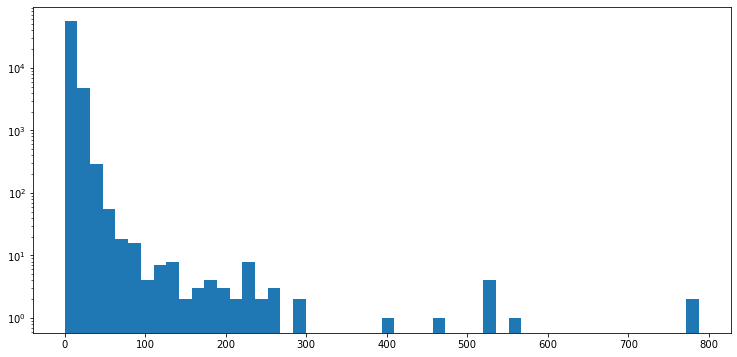

In [10]:
# Uncapped, a significant portion of the data run large. 
plt.hist(data['avg_purchase'],bins=50) # Output RuntimeWarning due to NaN values in bins. 
plt.yscale('log')

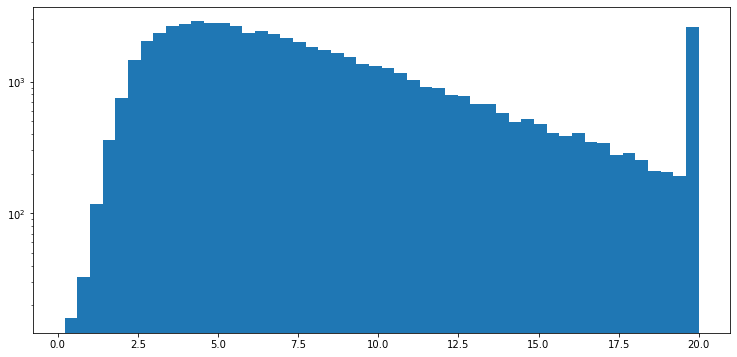

In [11]:
# When capped at $20, the distribution becomes much more smooth. 
plt.hist(data['avg_purchase_capped'],bins=50)
plt.yscale('log')

In [12]:
# Visualize initial entries in data. 
data.head(10)

customer_id  avg_distance_to_shops  min_distance_to_shops  \
0            1             1434.91910              985.87620   
1            2              909.76764              254.94832   
2            3             1498.94700              754.29560   
3            4              561.65900              362.79178   
4            5              605.36280              275.46753   
5            6             2603.69560             1972.48940   
6            7             2068.84280             2068.84280   
7            8             1399.30570              245.44533   
8            9             1789.29030              164.82315   
9           10             1940.03210              968.77356   

   max_distance_to_shops  products_purchased  unique_products_purchased  \
0              4082.5222                3090                        473   
1              2295.4840                4508                        486   
2              2831.7727                 814                        234   
3              2210.3820                 648                        208   
4              1375.1184                  13                         10   
5              3697.2300                2783                        620   
6              2068.8428                  20                         19   
7              1679.8247                2601                        322   
8              3199.9387                7977                        743   
9              2437.8691                3810                        552   

   amount_purchased  avg_purchase  avg_price  shops_used  ...  \
0          7551.701     14.221659   3.150493           2  ...   
1          7820.219     11.235947   2.191422           4  ...   
2          1788.613      5.453088   2.258994           4  ...   
3          1679.520      5.976940   2.614292           4  ...   
4            17.922      1.792200   1.692000           2  ...   
5          6346.385      7.059382   2.785088           4  ...   
6            47.157      2.481947   2.355105           1  ...   
7          6939.357     18.071241   2.983021           3  ...   
8         17245.062     15.777733   3.072187           2  ...   
9          8434.010     11.553438   2.552993           3  ...   

   avg_purchase_shop_2  avg_purchase_shop_3  avg_purchase_shop_4  \
0            14.862848             0.000000                  0.0   
1             4.848720             2.546600                  0.0   
2             5.605183             1.923385                  0.0   
3             2.688400             5.029184                  0.0   
4             0.967667             2.145571                  0.0   
5             8.044698             2.704978                  0.0   
6             0.000000             0.000000                  0.0   
7            22.527120             3.600365                  0.0   
8            19.118874             0.000000                  0.0   
9            14.952691             0.334000                  0.0   

   avg_purchase_shop_5  avg_price_shop_1  avg_price_shop_2  avg_price_shop_3  \
0             0.000000          6.393403          2.600485          0.000000   
1            16.479185          2.851152          2.009863          2.059450   
2             5.924268          3.426687          2.478529          1.923385   
3             7.156351          4.997400          2.688400          2.083168   
4             0.000000          0.000000          0.633667          2.145571   
5             1.984538          3.349176          2.525061          2.082261   
6             0.000000          2.355105          0.000000          0.000000   
7             0.000000          5.227889          2.965092          2.507716   
8             0.000000          3.339414          2.764455          0.000000   
9             0.000000          2.632964          2.521915          0.334000   

   avg_price_shop_4  avg_price_shop_5  avg_purchase_capped  
0               0.0          0.000000            14.221659  
1   

In [13]:
# Visualize final entries in data.
data.tail(5)

customer_id  avg_distance_to_shops  min_distance_to_shops  \
60360        60361             4760.89000             2816.33200   
60361        60362             1168.94510             1168.94510   
60362        60363              938.86285              938.86285   
60363        60364             1727.25200             1727.25200   
60364        60365             1025.58670             1025.58670   

       max_distance_to_shops  products_purchased  unique_products_purchased  \
60360             5965.67100                 245                        118   
60361             1168.94510                1075                        266   
60362              938.86285                  10                          8   
60363             1727.25200                  74                         52   
60364             1025.58670                   2                          2   

       amount_purchased  avg_purchase  avg_price  shops_used  ...  \
60360           534.747      3.588906   2.155242           2  ...   
60361          2209.502      8.306398   2.662929           1  ...   
60362            24.102      3.012750   2.322125           1  ...   
60363           442.016      8.500308   7.123712           1  ...   
60364            14.705      7.352500   7.352500           1  ...   

       avg_purchase_shop_2  avg_purchase_shop_3  avg_purchase_shop_4  \
60360             3.770281                  0.0                  0.0   
60361             0.000000                  0.0                  0.0   
60362             0.000000                  0.0                  0.0   
60363             0.000000                  0.0                  0.0   
60364             0.000000                  0.0                  0.0   

       avg_purchase_shop_5  avg_price_shop_1  avg_price_shop_2  \
60360                  0.0          2.229304          2.035702   
60361                  0.0          2.662929          0.000000   
60362                  0.0          2.322125          0.000000   
60363                  0.0          7.123712          0.000000   
60364                  0.0          7.352500          0.000000   

       avg_price_shop_3  avg_price_shop_4  avg_price_shop_5  \
60360               0.0               0.0               0.0   
60361               0.0               0.0               0.0   
60362               0.0               0.0               0.0   
60363               0.0               0.0               0.0   
60364               0.0               0.0               0.0   

       avg_purchase_capped  
60360             3.588906  
60361             8.306398  
60362             3.012750  
60363             8.500308  
60364             7.352500  

[5 rows x 41 columns]

In [14]:
# Return descriptive statistics for each field in data: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
data.describe()

customer_id  avg_distance_to_shops  min_distance_to_shops  \
count  60365.000000           60365.000000           60365.000000   
mean   30183.000000            2030.227290            1396.438077   
std    17426.018837            1119.909710            1048.415728   
min        1.000000               6.642472               6.642472   
25%    15092.000000            1250.239000             573.610700   
50%    30183.000000            1936.880200            1184.943000   
75%    45274.000000            2569.706800            1962.384500   
max    60365.000000            9004.164000            9004.164000   

       max_distance_to_shops  products_purchased  unique_products_purchased  \
count           60365.000000        60365.000000               60365.000000   
mean             2942.667579         1778.712383                 330.668185   
std              1327.528871         2185.051073                 236.004343   
min                 6.642472            1.000000                   1.000000   
25%              2117.183000          227.000000                 127.000000   
50%              2869.195300          925.000000                 304.000000   
75%              3580.669700         2552.000000                 500.000000   
max              9267.698000        22131.000000                1465.000000   

       amount_purchased  avg_purchase     avg_price    shops_used  ...  \
count      60365.000000  60365.000000  60365.000000  60365.000000  ...   
mean        4235.493251      8.532106      3.666521      2.380055  ...   
std         5006.777082     10.315527      9.133248      1.012191  ...   
min            0.212000      0.212000      0.212000      1.000000  ...   
25%          653.107000      4.532897      2.533746      2.000000  ...   
50%         2355.138000      6.862780      2.944260      2.000000  ...   
75%         6054.631000     10.429567      3.558136      3.000000  ...   
max        51588.656000    787.569000    787.569000      5.000000  ...   

       avg_purchase_shop_2  avg_purchase_shop_3  avg_purchase_shop_4  \
count         60365.000000         60365.000000         60365.000000   
mean              4.974444             1.520439             0.757015   
std              11.230421             3.687771             4.902900   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               3.209500             0.000000             0.000000   
75%               5.978667             2.107333             0.000000   
max             787.569000           263.234000           522.607000   

       avg_purchase_shop_5  avg_price_shop_1  avg_price_shop_2  \
count         60365.000000      60365.000000      60365.000000   
mean              0.808149          4.681594          2.297996   
std               2.603252         15.956206          9.966532   
min               0.000000          0.000000          0.000000   
25%               0.000000          2.647582          0.000000   
50%               0.000000          3.251849          2.296768   
75%               0.000000          4.166951          2.717514   
max             133.967250        787.569000        787.569000   

       avg_price_shop_3  avg_price_shop_4  avg_price_shop_5  \
count      60365.000000      60365.000000      60365.000000   
mean           0.760332          0.444556          0.453603   
std            1.897961          4.386018          1.325884   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            1.840343          0.000000          0.000000   
max          263.234000        522.607000        133.967250   

       avg_purchase_capped  
count         60365.000000  
mean              8.056172  
std               4.633679  
min               0.212000  
25%               4.532897  
50%               6.8

In [15]:
# Return mean values of each field. 
field_means = data.mean()
field_means.head()

customer_id              30183.000000
avg_distance_to_shops     2030.227290
min_distance_to_shops     1396.438077
max_distance_to_shops     2942.667579
products_purchased        1778.712383
dtype: float64

In [16]:
# Count non-NA values for each field:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html
data.count()

customer_id                         60365
avg_distance_to_shops               60365
min_distance_to_shops               60365
max_distance_to_shops               60365
products_purchased                  60365
unique_products_purchased           60365
amount_purchased                    60365
avg_purchase                        60365
avg_price                           60365
shops_used                          60365
distance_shop_1                     60365
distance_shop_2                     60365
distance_shop_3                     60365
distance_shop_4                     60365
distance_shop_5                     60365
products_purchased_shop_1           60365
products_purchased_shop_2           60365
products_purchased_shop_3           60365
products_purchased_shop_4           60365
products_purchased_shop_5           60365
unique_products_purchased_shop_1    60365
unique_products_purchased_shop_2    60365
unique_products_purchased_shop_3    60365
unique_products_purchased_shop_4  

In [17]:
# Return column names in list 'cols', and # of records in value 'numrecords'
cols = data.columns.tolist()
numrecords = len(data)
# f-Strings for string formatting: https://realpython.com/python-f-strings/
# col_names = ', '.join(cols)
# print(f'The columns are {col_names}.')
# print(f'The number of records is {numrecords}.')

In [18]:
# Return number of unique values per field. 
for col in cols:
    print(f'{col} # unique values: {len(data[col].unique())}')

customer_id # unique values: 60365
avg_distance_to_shops # unique values: 55692
min_distance_to_shops # unique values: 18475
max_distance_to_shops # unique values: 19567
products_purchased # unique values: 8209
unique_products_purchased # unique values: 1129
amount_purchased # unique values: 59791
avg_purchase # unique values: 59945
avg_price # unique values: 59770
shops_used # unique values: 5
distance_shop_1 # unique values: 11666
distance_shop_2 # unique values: 11669
distance_shop_3 # unique values: 11665
distance_shop_4 # unique values: 11666
distance_shop_5 # unique values: 11667
products_purchased_shop_1 # unique values: 5874
products_purchased_shop_2 # unique values: 5357
products_purchased_shop_3 # unique values: 2815
products_purchased_shop_4 # unique values: 1539
products_purchased_shop_5 # unique values: 1763
unique_products_purchased_shop_1 # unique values: 1058
unique_products_purchased_shop_2 # unique values: 898
unique_products_purchased_shop_3 # unique values: 660
uniq

In [19]:
# Return number of nonzero entries per column.
data.astype(bool).sum(axis=0)

customer_id                         60365
avg_distance_to_shops               60365
min_distance_to_shops               60365
max_distance_to_shops               60365
products_purchased                  60365
unique_products_purchased           60365
amount_purchased                    60365
avg_purchase                        60365
avg_price                           60365
shops_used                          60365
distance_shop_1                     60365
distance_shop_2                     60365
distance_shop_3                     60365
distance_shop_4                     60365
distance_shop_5                     60365
products_purchased_shop_1           55552
products_purchased_shop_2           44794
products_purchased_shop_3           20503
products_purchased_shop_4           10400
products_purchased_shop_5           12423
unique_products_purchased_shop_1    55552
unique_products_purchased_shop_2    44794
unique_products_purchased_shop_3    20503
unique_products_purchased_shop_4  

In [20]:
# Summary statistics
summary = pd.DataFrame(index = data.columns)
summary['Data type'] = data.dtypes.values
summary['# Nonnull records'] = data.count().values
summary['# Non-zero records'] = data.astype(bool).sum(axis=0)
summary['% Populated'] = round(data.count()/data.shape[0]*100,2)
summary['# Unique values'] = data.nunique().values
summary['Mean'] = round(data.mean(),2)
summary['Std'] = round(data.std(),2)
summary['Min'] = round(data.min(),2)
summary['Max'] = round(data.max(),2)
summary

Data type  # Nonnull records  \
customer_id                          int64              60365   
avg_distance_to_shops              float64              60365   
min_distance_to_shops              float64              60365   
max_distance_to_shops              float64              60365   
products_purchased                   int64              60365   
unique_products_purchased            int64              60365   
amount_purchased                   float64              60365   
avg_purchase                       float64              60365   
avg_price                          float64              60365   
shops_used                           int64              60365   
distance_shop_1                    float64              60365   
distance_shop_2                    float64              60365   
distance_shop_3                    float64              60365   
distance_shop_4                    float64              60365   
distance_shop_5                    float64              60365   
products_purchased_shop_1            int64              60365   
products_purchased_shop_2            int64              60365   
products_purchased_shop_3            int64              60365   
products_purchased_shop_4            int64              60365   
products_purchased_shop_5            int64              60365   
unique_products_purchased_shop_1     int64              60365   
unique_products_purchased_shop_2     int64              60365   
unique_products_purchased_shop_3     int64              60365   
unique_products_purchased_shop_4     int64              60365   
unique_products_purchased_shop_5     int64              60365   
amount_purchased_shop_1            float64              60365   
amount_purchased_shop_2            float64              60365   
amount_purchased_shop_3            float64              60365   
amount_purchased_shop_4            float64              60365   
amount_purchased_shop_5            float64              60365   
avg_purchase_shop_1                float64              60365   
avg_purchase_shop_2                float64              60365   
avg_purchase_shop_3                float64              60365   
avg_purchase_shop_4                float64              60365   
avg_purchase_shop_5                float64              60365   
avg_price_shop_1                   float64              60365   
avg_price_shop_2                   float64              60365   
avg_price_shop_3                   float64              60365   
avg_price_shop_4                   float64              60365   
avg_price_shop_5                   float64              60365   
avg_purchase_capped                float64              60365   

                                  # Non-zero records  % Populated  \
customer_id                                    60365        100.0   
avg_distance_to_shops                          60365        100.0   
min_distance_to_shops                          60365        100.0   
max_distance_to_shops                          60365        100.0   
products_purchased                             60365        100.0   
unique_products_purchased                      60365        100.0   
amount_purchased                               60365        100.0   
avg_purchase                                   60365        100.0   
avg_price                                      60365        100.0   
shops_used                                     60365        100.0   
distance_shop_1                                60365        100.0   
distance_shop_2                                60365        100.0   
distance_shop_3                                60365        100.0   
distance_shop_4                                60365        100.0   
distance_shop_5                                60365        100.0   
products_purchased_shop_1                      55552        100.0   
products_purchased_shop_2                      44794        100.0   
products_purchased_shop_3                      20503        

## 3. Visualize Pair-wise Correlation in Data.

In [21]:
# Plot correlation matrix: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html 
cormat = data.corr(method='pearson')
cormat.style.background_gradient(cmap='coolwarm').set_precision(2)

In [22]:
#  an easier to examine correlation matrix

correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = np.flip(corr_array, axis=1),
                   x = list(reversed(matrix_cols)),
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data_corr = [trace]
# py.init_notebook_mode() # if the figure doesn't show in notebook, uncomment this line
fig = go.Figure(data=data_corr,layout=layout)
py.iplot(fig)

## 4. Customer Segmentation

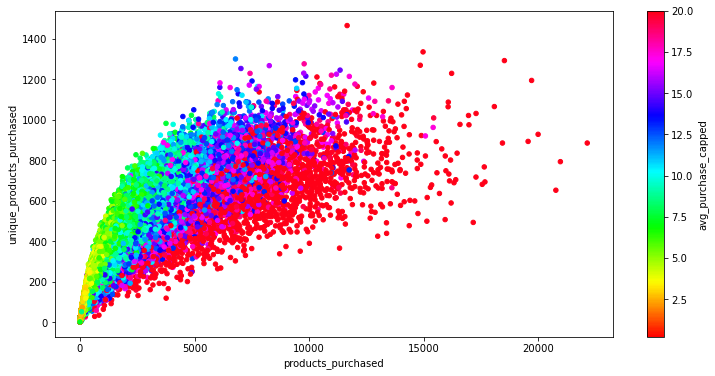

In [23]:
# Two choices of dimensions for customer segmentation. Segmentation 1 used for homework 3. 

# Segmentation data 1:
# x1_axis = 'min_distance_to_shops'
# x2_axis = 'max_distance_to_shops'
# Y_column = 'amount_purchased'

# Segmentation data 2:
x1_axis = 'products_purchased'
x2_axis = 'unique_products_purchased'
Y_column = 'avg_purchase_capped'

X = data[[x1_axis,x2_axis]]
Y = data[[Y_column]]

# Z-scaling: https://platform.ayasdi.com/sdkdocs/transformations/z-scoring.html
Xz = (X-X.mean()) / X.std()
# X.plot.scatter(x1_axis, x2_axis, cmap = 'hsv', c = data[Y_column])
data.plot(kind='scatter', x=x1_axis, y=x2_axis, cmap = 'hsv', c = Y_column, sharex=False)
plt.savefig('customer scatter.png')

In [24]:
Y.describe()

avg_purchase_capped
count         60365.000000
mean              8.056172
std               4.633679
min               0.212000
25%               4.532897
50%               6.862780
75%              10.429567
max              20.000000

In [25]:
X.describe()

products_purchased  unique_products_purchased
count        60365.000000               60365.000000
mean          1778.712383                 330.668185
std           2185.051073                 236.004343
min              1.000000                   1.000000
25%            227.000000                 127.000000
50%            925.000000                 304.000000
75%           2552.000000                 500.000000
max          22131.000000                1465.000000

In [26]:
Xz.describe()

products_purchased  unique_products_purchased
count        6.036500e+04               6.036500e+04
mean         7.405987e-16              -1.730377e-16
std          1.000000e+00               1.000000e+00
min         -8.135793e-01              -1.396873e+00
25%         -7.101493e-01              -8.629849e-01
50%         -3.907059e-01              -1.129987e-01
75%          3.538991e-01               7.174945e-01
max          9.314330e+00               4.806402e+00

### 4.a Choosing the Number of Clusters

In [27]:
# Performs KMeans clustering, and select maximum cluster number which satisfies silhouette score of >= 0.48.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

matrix = Xz.values

for n in range(4,9):
#     kmeans = KMeans(init='k-means++', n_clusters = n, n_init=30, n_jobs=-1) # n_jobs deprecated in version 0.23.
    kmeans = KMeans(init='k-means++', n_clusters = n, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    centroids = kmeans.cluster_centers_
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For # clusters =", n, "the average silhouette_score is :", silhouette_avg)
    
    if silhouette_avg >= 0.48: 
        num_clusters = n

print("The chosen # of clusters is ", num_clusters)

For # clusters = 4 the average silhouette_score is : 0.5194624693101714
For # clusters = 5 the average silhouette_score is : 0.49744145771740306
For # clusters = 6 the average silhouette_score is : 0.48181689321309906
For # clusters = 7 the average silhouette_score is : 0.4641573695748042
For # clusters = 8 the average silhouette_score is : 0.4472004613580693
The chosen # of clusters is  6


### 4.b Decision Tree Clustering

In [28]:
# Perform decision tree clustering: 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

clf = DecisionTreeRegressor(max_depth=7,max_leaf_nodes=num_clusters,min_samples_leaf=3000)
        
clf.fit(X, Y)
goodness = clf.score(X,Y)

print(goodness) 

0.6009027856271814


In [29]:
# Append DT Label as field to data. 

data['DT_cluster'] = clf.apply(X)
data.head()

customer_id  avg_distance_to_shops  min_distance_to_shops  \
0            1             1434.91910              985.87620   
1            2              909.76764              254.94832   
2            3             1498.94700              754.29560   
3            4              561.65900              362.79178   
4            5              605.36280              275.46753   

   max_distance_to_shops  products_purchased  unique_products_purchased  \
0              4082.5222                3090                        473   
1              2295.4840                4508                        486   
2              2831.7727                 814                        234   
3              2210.3820                 648                        208   
4              1375.1184                  13                         10   

   amount_purchased  avg_purchase  avg_price  shops_used  ...  \
0          7551.701     14.221659   3.150493           2  ...   
1          7820.219     11.235947   2.191422           4  ...   
2          1788.613      5.453088   2.258994           4  ...   
3          1679.520      5.976940   2.614292           4  ...   
4            17.922      1.792200   1.692000           2  ...   

   avg_purchase_shop_3  avg_purchase_shop_4  avg_purchase_shop_5  \
0             0.000000                  0.0             0.000000   
1             2.546600                  0.0            16.479185   
2             1.923385                  0.0             5.924268   
3             5.029184                  0.0             7.156351   
4             2.145571                  0.0             0.000000   

   avg_price_shop_1  avg_price_shop_2  avg_price_shop_3  avg_price_shop_4  \
0          6.393403          2.600485          0.000000               0.0   
1          2.851152          2.009863          2.059450               0.0   
2          3.426687          2.478529          1.923385               0.0   
3          4.997400          2.688400          2.083168               0.0   
4          0.000000          0.633667          2.145571               0.0   

   avg_price_shop_5  avg_purchase_capped  DT_cluster  
0          0.000000            14.221659           7  
1          2.103394            11.235947           7  
2          1.947067             5.453088           3  
3          2.754427             5.976940           3  
4          0.000000             1.792200           3  

[5 rows x 42 columns]

In [30]:
# Glean general information regarding DT clusters. 

groupDT = data.groupby('DT_cluster',as_index=False)[['products_purchased','unique_products_purchased']].mean()
groupDT.sort_values('products_purchased')

DT_cluster  products_purchased  unique_products_purchased
0           3          308.782707                 141.023859
1           4         1613.162444                 410.958417
4           9         3066.637238                 609.450764
3           7         3274.335539                 434.877895
5          10         4285.333522                 658.111080
2           6         7144.449329                 727.113666

In [31]:
# GraphViz error due to version or PATH issues, consider alternative plot_tree below.

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#             filled=True, rounded=True,
#             special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())
# # Export as dot file
# export_graphviz(clf, out_file='tree.dot', 
#             rounded = True, proportion = False, 
#             precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

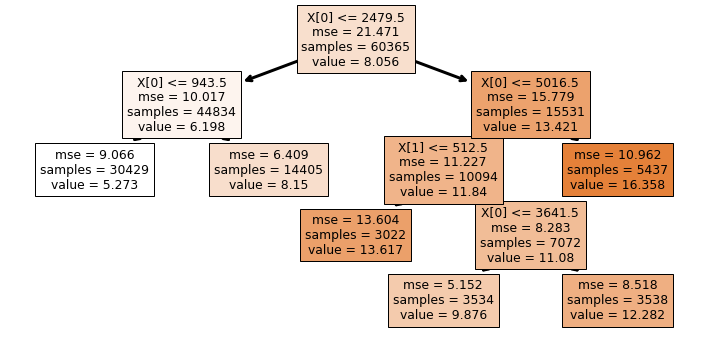

In [32]:
# Decision tree plotting via plot_tree: 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

from sklearn.tree import DecisionTreeClassifier, plot_tree

# plot_tree(clf, filled=True) # Does not visualize arrows, for whaterver reason.

out = plot_tree(clf, filled=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

<Figure size 1224x504 with 0 Axes>

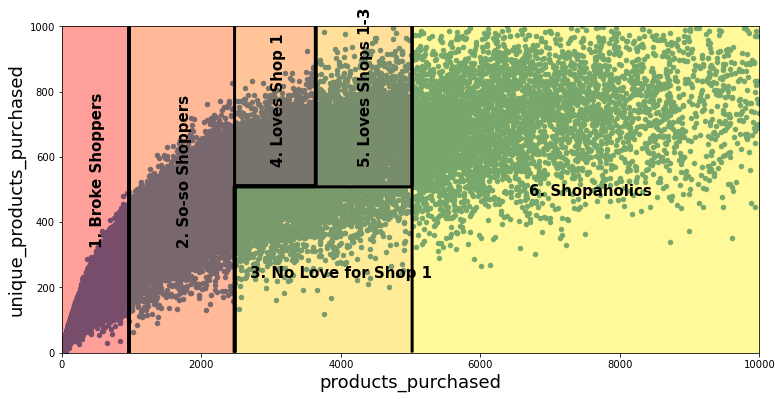

In [33]:
# Visualize DT segments. 

from matplotlib.colors import ListedColormap
x1_high = 10000
x2_high = 1000

def plot_decision_boundary(clf, X, y, axes=[0, x1_high, 0, x2_high]):
    x1s = np.linspace(axes[0], axes[1], 500)
    x2s = np.linspace(axes[2], axes[3], 200)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
# other cmap to try: gray, spring, summer, afmhot, hot, gist_heat, winter...
    plt.contourf(x1, x2, y_pred, alpha=0.4, cmap='autumn')
    plt.contour(x1, x2, y_pred, linewidths=3, colors='black')
    plt.xlabel(x1_axis, fontsize=18)
    plt.ylabel(x2_axis, fontsize=18)
    plt.text(400,330,"1. Broke Shoppers",fontsize=15,rotation='vertical',weight='bold')
    plt.text(1650,330,"2. So-so Shoppers",fontsize=15,rotation='vertical',weight='bold')
    plt.text(2700,230,"3. No Love for Shop 1",fontsize=15,weight='bold')
    plt.text(3000,580,"4. Loves Shop 1",fontsize=15,rotation='vertical',weight='bold')
    plt.text(4250,580,"5. Loves Shops 1-3",fontsize=15,rotation='vertical',weight='bold')
    plt.text(6700,480,"6. Shopaholics",fontsize=15,weight='bold')
plt.figure(figsize=(17, 7))
X1 = X[X[x1_axis] <= x1_high]
Xsmall = X1[X1[x2_axis] <= x2_high]
Xsmall.plot.scatter(x1_axis,x2_axis)
plt.xlim(0,x1_high)
plt.ylim(0,x2_high)
plot_decision_boundary(clf, X, Y)
plt.savefig('Decision Tree Segments.png')

### 4.c K-means Clustering

In [34]:
# Perform k-means clustering:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

print(f'The chosen # of clusters is {num_clusters}.')

kmeans = KMeans(init='k-means++', n_clusters = num_clusters, n_init=30)
kmeans.fit(matrix)
clusters = kmeans.predict(matrix)
centroids = kmeans.cluster_centers_
silhouette_avg = silhouette_score(matrix, clusters)

print(f'For # clusters = {num_clusters}, the average silhouette score is: {silhouette_avg}.')

The chosen # of clusters is 6.
For # clusters = 6, the average silhouette score is: 0.4830887400744389.


In [35]:
# Define a function to graph the silhouette scores. 

def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
#     plt.rcParams["patch.force_edgecolor"] = True
    import matplotlib as mpl
    import matplotlib.cm as cm
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
 
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
         
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
         
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

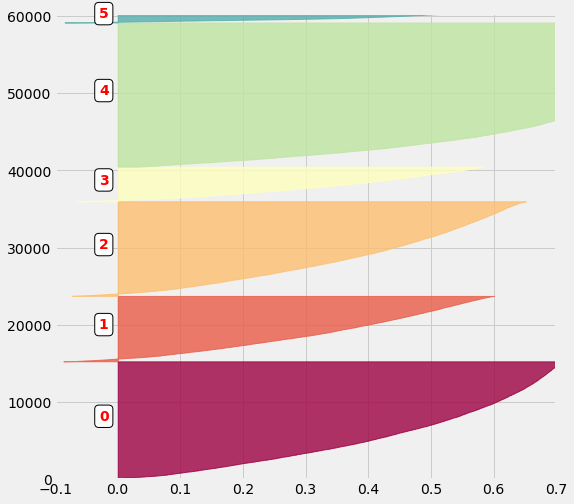

In [36]:
# Graph silhouette scores of k-means clusters:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

sample_silhouette_values = silhouette_samples(matrix, clusters)

graph_component_silhouette(num_clusters, [-0.1, .7], len(X), sample_silhouette_values, clusters)
plt.savefig('silouhette scores.pdf')

In [37]:
# Count number of customers in each k-means cluster; more asymmetry may be less optimal. 

pd.DataFrame(pd.Series(clusters).value_counts(), columns = ['# Customers']).T

4      0      2     1     3     5
# Customers  18670  15270  12250  8464  4468  1243

In [38]:
# Locate centroids, or the center-of-mass, for each k-means cluster:
# https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

print(centroids)

[[-0.47112998 -0.29886953]
 [ 0.84573061  1.11075038]
 [ 0.04590753  0.45733096]
 [ 1.97520422  1.69090648]
 [-0.75557558 -1.09788375]
 [ 3.86993995  2.04516735]]


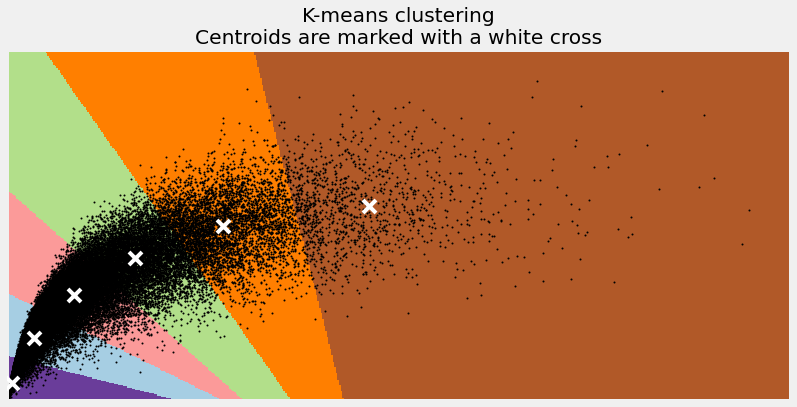

In [39]:
# Visualize k-means clustering. 

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = matrix[:, 0].min(), matrix[:, 0].max()
y_min, y_max = matrix[:, 1].min(), matrix[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(matrix[:, 0], matrix[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering\n'
          'Centroids are marked with a white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('kmeans segmentation.png')
plt.show()

In [40]:
# Append k-means label as a field to data. 

data['Knn_cluster'] = clusters
data.head(10)

customer_id  avg_distance_to_shops  min_distance_to_shops  \
0            1             1434.91910              985.87620   
1            2              909.76764              254.94832   
2            3             1498.94700              754.29560   
3            4              561.65900              362.79178   
4            5              605.36280              275.46753   
5            6             2603.69560             1972.48940   
6            7             2068.84280             2068.84280   
7            8             1399.30570              245.44533   
8            9             1789.29030              164.82315   
9           10             1940.03210              968.77356   

   max_distance_to_shops  products_purchased  unique_products_purchased  \
0              4082.5222                3090                        473   
1              2295.4840                4508                        486   
2              2831.7727                 814                        234   
3              2210.3820                 648                        208   
4              1375.1184                  13                         10   
5              3697.2300                2783                        620   
6              2068.8428                  20                         19   
7              1679.8247                2601                        322   
8              3199.9387                7977                        743   
9              2437.8691                3810                        552   

   amount_purchased  avg_purchase  avg_price  shops_used  ...  \
0          7551.701     14.221659   3.150493           2  ...   
1          7820.219     11.235947   2.191422           4  ...   
2          1788.613      5.453088   2.258994           4  ...   
3          1679.520      5.976940   2.614292           4  ...   
4            17.922      1.792200   1.692000           2  ...   
5          6346.385      7.059382   2.785088           4  ...   
6            47.157      2.481947   2.355105           1  ...   
7          6939.357     18.071241   2.983021           3  ...   
8         17245.062     15.777733   3.072187           2  ...   
9          8434.010     11.553438   2.552993           3  ...   

   avg_purchase_shop_4  avg_purchase_shop_5  avg_price_shop_1  \
0                  0.0             0.000000          6.393403   
1                  0.0            16.479185          2.851152   
2                  0.0             5.924268          3.426687   
3                  0.0             7.156351          4.997400   
4                  0.0             0.000000          0.000000   
5                  0.0             1.984538          3.349176   
6                  0.0             0.000000          2.355105   
7                  0.0             0.000000          5.227889   
8                  0.0             0.000000          3.339414   
9                  0.0             0.000000          2.632964   

   avg_price_shop_2  avg_price_shop_3  avg_price_shop_4  avg_price_shop_5  \
0          2.600485          0.000000               0.0          0.000000   
1          2.009863          2.059450               0.0          2.103394   
2          2.478529          1.923385               0.0          1.947067   
3          2.688400          2.083168               0.0          2.754427   
4          0.633667          2.145571               0.0          0.000000   
5          2.525061          2.082261               0.0          1.914615   
6          0.000000          0.000000               0.0          0.000000   
7          2.965092          2.507716               0.0          0.000000   
8          2.764455          0.000000               0.0          0.000000   
9          2.521915          0.334000               0.0          0.000000   

   avg_purchase_capped  DT_cluster  Knn_cluster  
0            14.221659           7            1  
1            11.235947           7            1  
2             5.453088           3        

In [41]:
# Glean general information regarding k-means clusters. 

groupKnn = data.groupby('Knn_cluster',as_index=False)[['products_purchased','unique_products_purchased']].mean()
groupKnn.sort_values('products_purchased')

Knn_cluster  products_purchased  unique_products_purchased
4            4          127.732994                  71.557472
0            0          748.962672                 260.028094
2            2         1876.422857                 438.345143
1            1         3621.435019                 592.429466
3            3         6087.587511                 729.440018
5            5        10227.828640                 813.345937

## 5. Segment Analysis

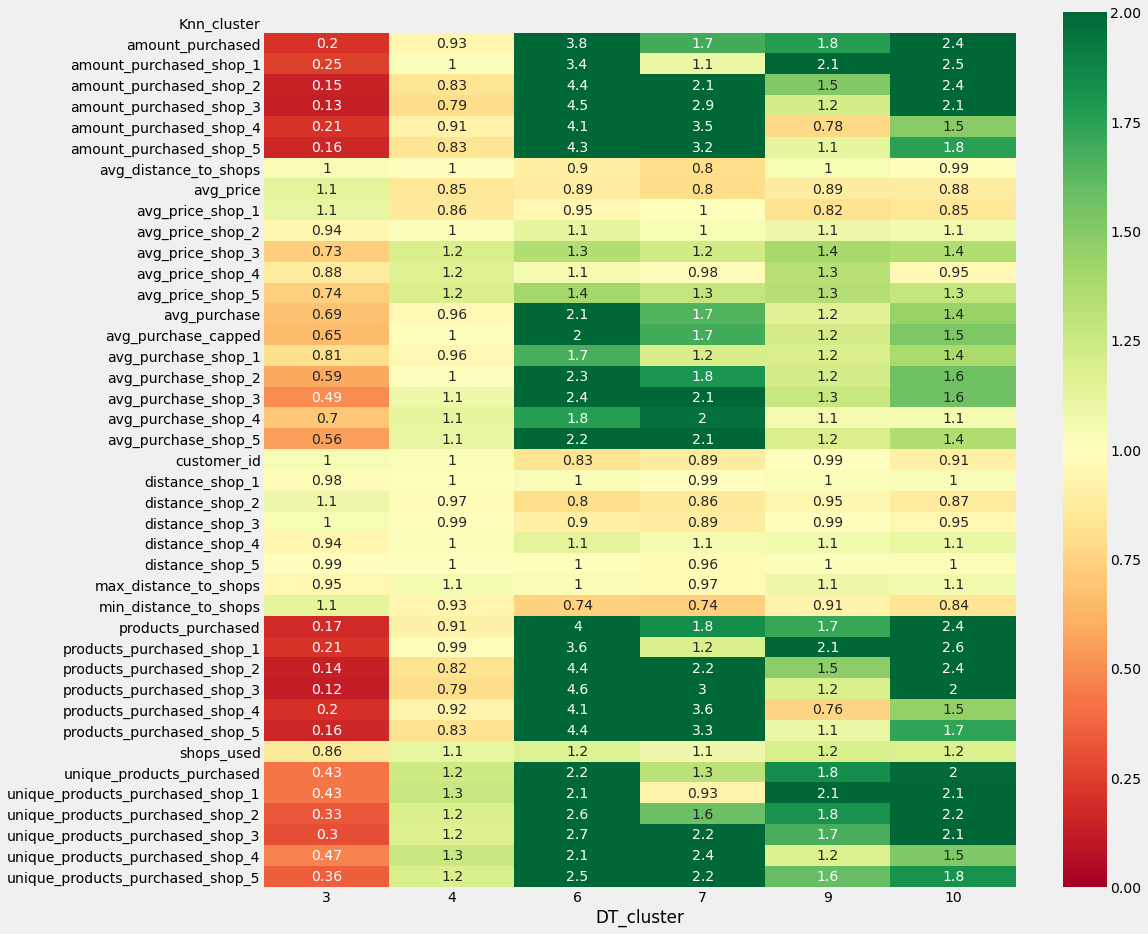

In [42]:
# Visualize segment attributes in DT clusters. 

DT_table = data.groupby('DT_cluster').mean()
DT_norm_table = DT_table / field_means
DT_norm_table_transpose = DT_norm_table.transpose()
plt.figure(figsize=(15,15))
sns.heatmap(DT_norm_table_transpose, cmap='RdYlGn', annot=True, vmin=0, vmax=2)

In [43]:
# Review cluster means. 

groupDT.sort_values('products_purchased')

DT_cluster  products_purchased  unique_products_purchased
0           3          308.782707                 141.023859
1           4         1613.162444                 410.958417
4           9         3066.637238                 609.450764
3           7         3274.335539                 434.877895
5          10         4285.333522                 658.111080
2           6         7144.449329                 727.113666

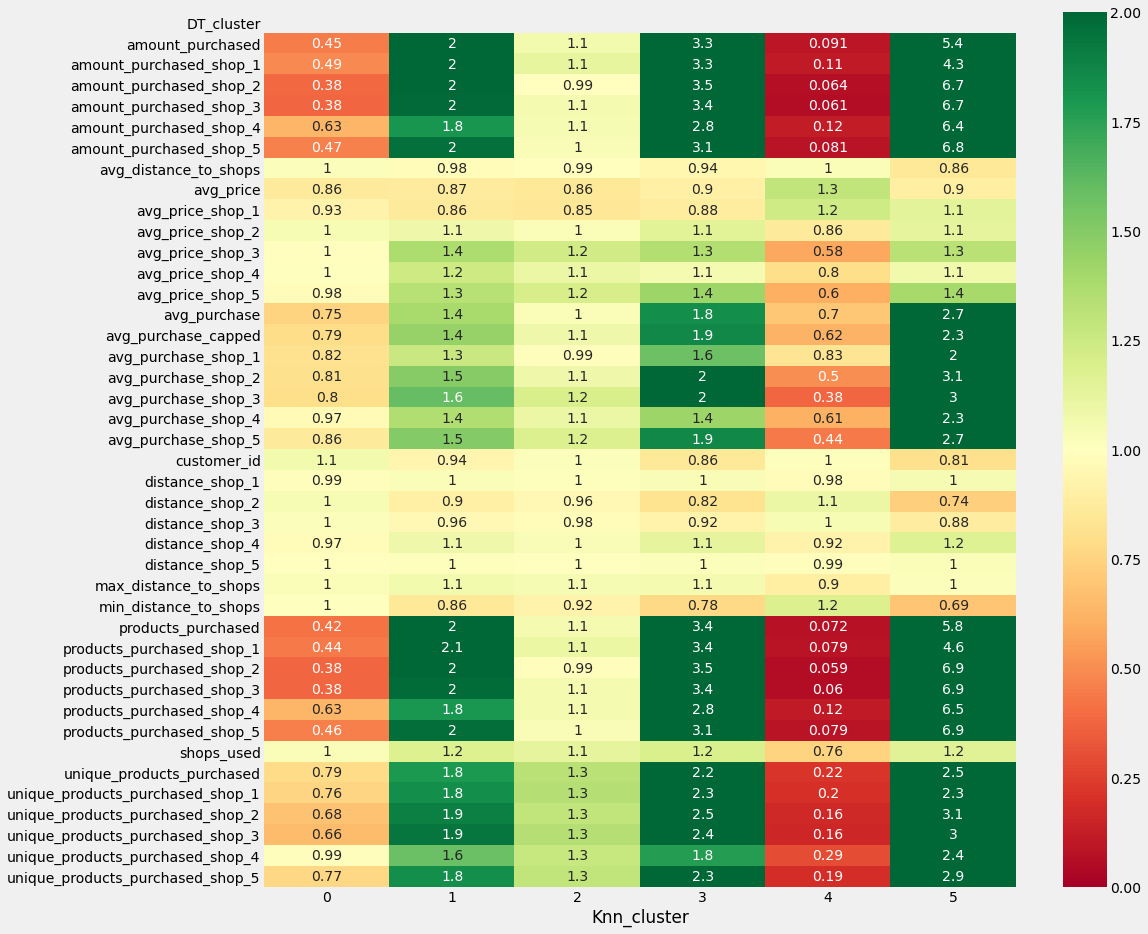

In [44]:
# Visualize segment attributes in k-means clusters. 

Knn_table = data.groupby('Knn_cluster').mean()
Knn_norm_table = Knn_table / field_means
Knn_norm_table_transpose = Knn_norm_table.transpose()
plt.figure(figsize=(15,15))
sns.heatmap(Knn_norm_table_transpose, cmap='RdYlGn', annot=True, vmin=0, vmax=2)

In [45]:
# Review cluster means. 

groupKnn.sort_values('products_purchased')

Knn_cluster  products_purchased  unique_products_purchased
4            4          127.732994                  71.557472
0            0          748.962672                 260.028094
2            2         1876.422857                 438.345143
1            1         3621.435019                 592.429466
3            3         6087.587511                 729.440018
5            5        10227.828640                 813.345937

## 6. Designing Customer Value Metrics

In [46]:
# Formulate customer value measure (CVM) as the product of amount_purchased (ap) and weighted terms f1, f2, and f3 accounting 
# for products_purchased (pp), unique_products_purchased (upp), and shops_used (su), respectively. 

# CVM = ap * f1 * f2 * f3
# f_gen = 1 + (h-1)/(1+e^-(var-mid)/c) # Generalized formula for expert factors
# f1: var = pp ; h = 1.2
# f2: var = upp; h = 1.3
# f3: var = su; h = 1.1

### 6.a Design Expert Factors

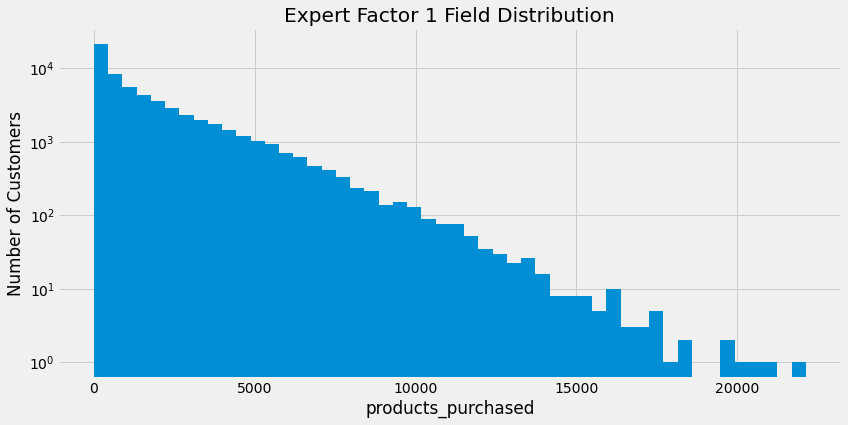

products_purchased
count        60365.000000
mean          1778.712383
std           2185.051073
min              1.000000
25%            227.000000
50%            925.000000
75%           2552.000000
max          22131.000000

In [47]:
# Analyze min_distance_to_shops (mdts).

plt.hist(data['products_purchased'],bins=50)
plt.title('Expert Factor 1 Field Distribution')
plt.xlabel('products_purchased')
plt.ylabel('Number of Customers')
plt.yscale('log')
plt.show()

data[['products_purchased']].describe()

Text(0.5, 0, 'Products Purchased')

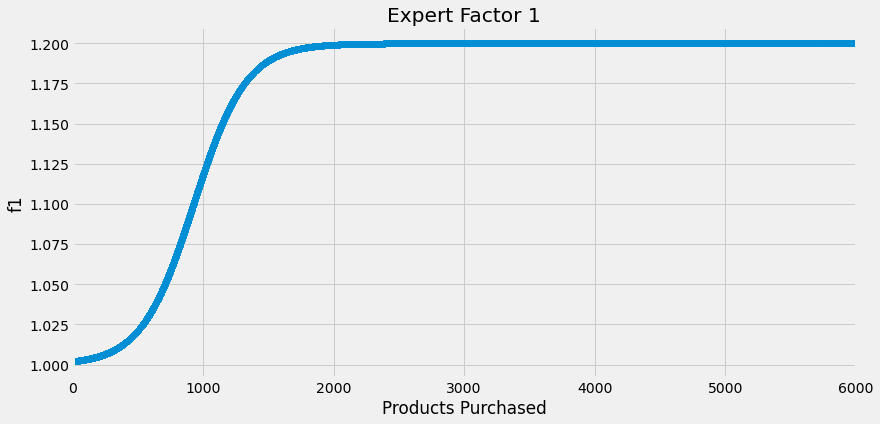

In [48]:
# Fine-tuning expert factor.

nmid_f1 = data['products_purchased'].median() # Setting variable median as the logistic midpoint. 
c_f1 = 200 # Tuned via gross inspection. 
data['f1'] = 1 + (1.2-1)/(1 + np.exp(-(data['products_purchased'] - nmid_f1)/c_f1))
data.plot.scatter('products_purchased','f1')
plt.xlim(0,6000)
plt.title('Expert Factor 1')
plt.xlabel('Products Purchased')

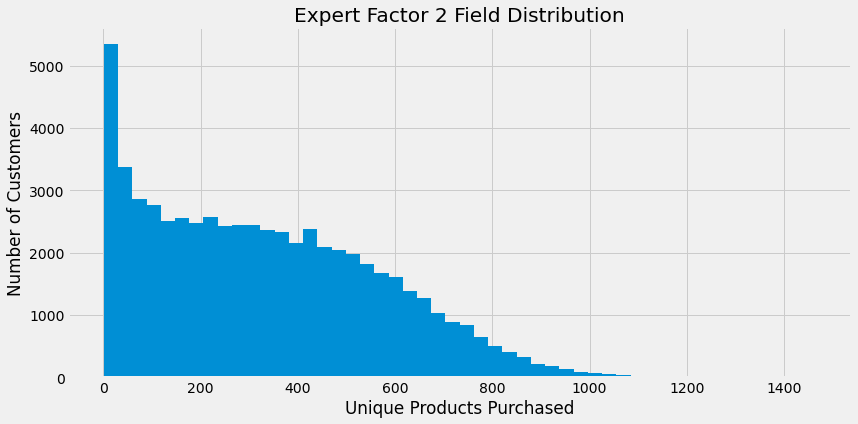

unique_products_purchased
count               60365.000000
mean                  330.668185
std                   236.004343
min                     1.000000
25%                   127.000000
50%                   304.000000
75%                   500.000000
max                  1465.000000

In [49]:
# Analyze unique_products_purchased (upp).

plt.hist(data['unique_products_purchased'],bins=50)
plt.title('Expert Factor 2 Field Distribution')
plt.xlabel('Unique Products Purchased')
plt.ylabel('Number of Customers')
plt.show()

data[['unique_products_purchased']].describe()

Text(0.5, 0, 'Unique Products Purchased')

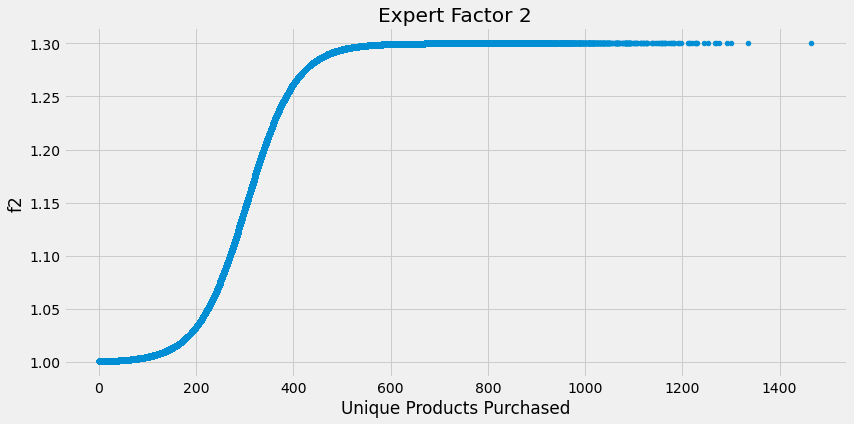

In [50]:
# Fine-tuning expert factor.

nmid_f2 = data['unique_products_purchased'].median() # Setting variable median as the logistic midpoint. 
c_f2 = 50 # Tuned via gross inspection. 
data['f2'] = 1 + (1.3-1)/(1 + np.exp(-(data['unique_products_purchased'] - nmid_f2)/c_f2))
data.plot.scatter('unique_products_purchased','f2')
plt.title('Expert Factor 2')
plt.xlabel('Unique Products Purchased')

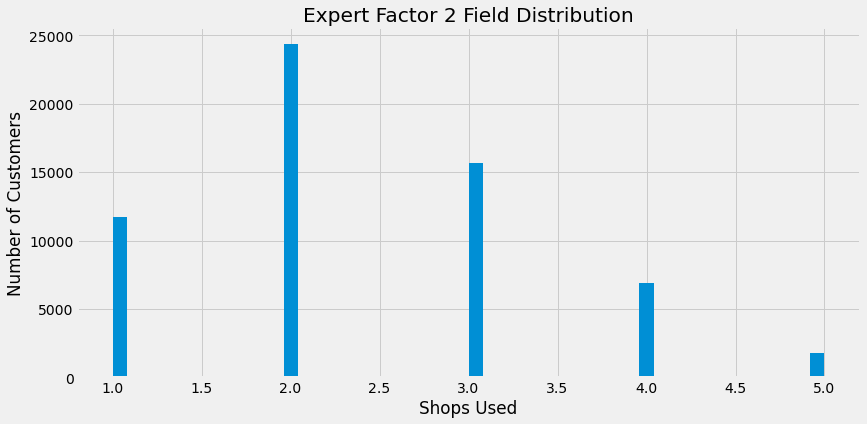

shops_used
count  60365.000000
mean       2.380055
std        1.012191
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000

In [51]:
# Analyze shops_used (su).

plt.hist(data['shops_used'],bins=50)
plt.title('Expert Factor 2 Field Distribution')
plt.xlabel('Shops Used')
plt.ylabel('Number of Customers')
plt.show()

data[['shops_used']].describe()

Text(0.5, 0, 'Minimum Distance to Shops')

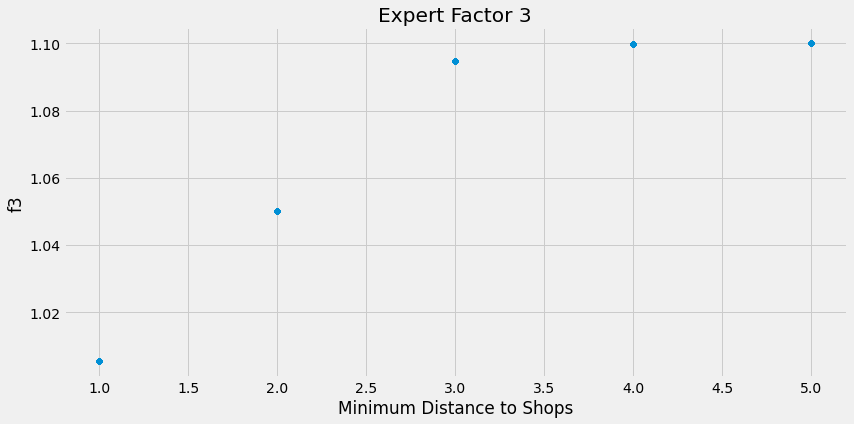

In [52]:
# Fine tuning expert factor. 

nmid_f3 = data['shops_used'].median() # Setting variable median as the logistic midpoint. 
c_f3 = .35 # Tuned via gross inspection. 
data['f3'] = 1 + (1.1-1)/(1 + np.exp(-(data['shops_used'] - nmid_f3)/c_f3))
data.plot.scatter('shops_used','f3')
plt.title('Expert Factor 3')
plt.xlabel('Minimum Distance to Shops')

### 6.b Computing CVM

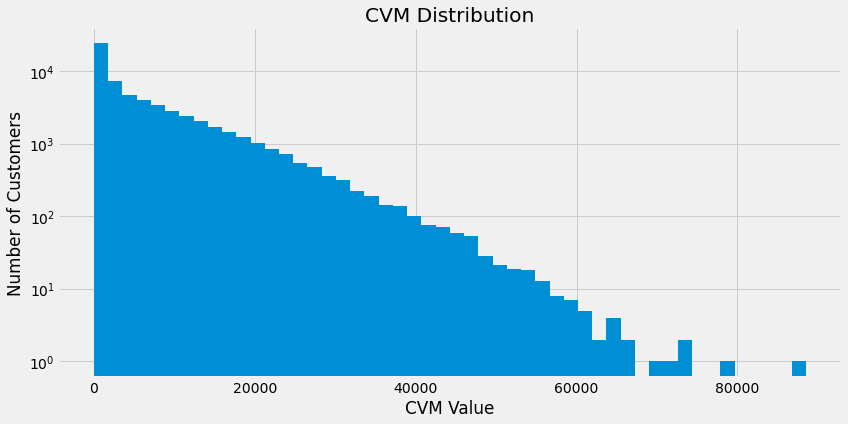

In [53]:
# Compute CVM as product of base metric and expert factors. 

data['CVM'] = data['amount_purchased'] * data['f1'] * data['f2'] * data['f3']
plt.hist(data['CVM'],bins=50)
plt.title('CVM Distribution')
plt.xlabel('CVM Value')
plt.ylabel('Number of Customers')
plt.yscale('log')

In [54]:
data.describe()

customer_id  avg_distance_to_shops  min_distance_to_shops  \
count  60365.000000           60365.000000           60365.000000   
mean   30183.000000            2030.227290            1396.438077   
std    17426.018837            1119.909710            1048.415728   
min        1.000000               6.642472               6.642472   
25%    15092.000000            1250.239000             573.610700   
50%    30183.000000            1936.880200            1184.943000   
75%    45274.000000            2569.706800            1962.384500   
max    60365.000000            9004.164000            9004.164000   

       max_distance_to_shops  products_purchased  unique_products_purchased  \
count           60365.000000        60365.000000               60365.000000   
mean             2942.667579         1778.712383                 330.668185   
std              1327.528871         2185.051073                 236.004343   
min                 6.642472            1.000000                   1.000000   
25%              2117.183000          227.000000                 127.000000   
50%              2869.195300          925.000000                 304.000000   
75%              3580.669700         2552.000000                 500.000000   
max              9267.698000        22131.000000                1465.000000   

       amount_purchased  avg_purchase     avg_price    shops_used  ...  \
count      60365.000000  60365.000000  60365.000000  60365.000000  ...   
mean        4235.493251      8.532106      3.666521      2.380055  ...   
std         5006.777082     10.315527      9.133248      1.012191  ...   
min            0.212000      0.212000      0.212000      1.000000  ...   
25%          653.107000      4.532897      2.533746      2.000000  ...   
50%         2355.138000      6.862780      2.944260      2.000000  ...   
75%         6054.631000     10.429567      3.558136      3.000000  ...   
max        51588.656000    787.569000    787.569000      5.000000  ...   

       avg_price_shop_3  avg_price_shop_4  avg_price_shop_5  \
count      60365.000000      60365.000000      60365.000000   
mean           0.760332          0.444556          0.453603   
std            1.897961          4.386018          1.325884   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            1.840343          0.000000          0.000000   
max          263.234000        522.607000        133.967250   

       avg_purchase_capped    DT_cluster   Knn_cluster            f1  \
count         60365.000000  60365.000000  60365.000000  60365.000000   
mean              8.056172      4.470620      2.108225      1.103114   
std               4.633679      2.160341      1.623844      0.088751   
min               0.212000      3.000000      0.000000      1.001951   
25%               4.532897      3.000000      0.000000      1.005920   
50%               6.862780      3.000000      2.000000      1.100000   
75%              10.429567      6.000000      4.000000      1.199941   
max              20.000000     10.000000      5.000000      1.200000   

                 f2            f3           CVM  
count  60365.000000  60365.000000  60365.000000  
mean       1.150887      1.060028   6775.374619  
std        0.128080      0.033966   8507.893649  
min        1.000699      1.005431      0.213717  
25%        1.008459      1.050000    700.815427  
50%        1.150000      1.050000   3195.643666  
75%        1.294163      1.094569  10002.677644  
max        1.300000      1.099981  88499.675101  

[8 rows x 47 columns]

In [55]:
data[['CVM']].describe()

CVM
count  60365.000000
mean    6775.374619
std     8507.893649
min        0.213717
25%      700.815427
50%     3195.643666
75%    10002.677644
max    88499.675101

### 6.c Visualizing CVM Distribution

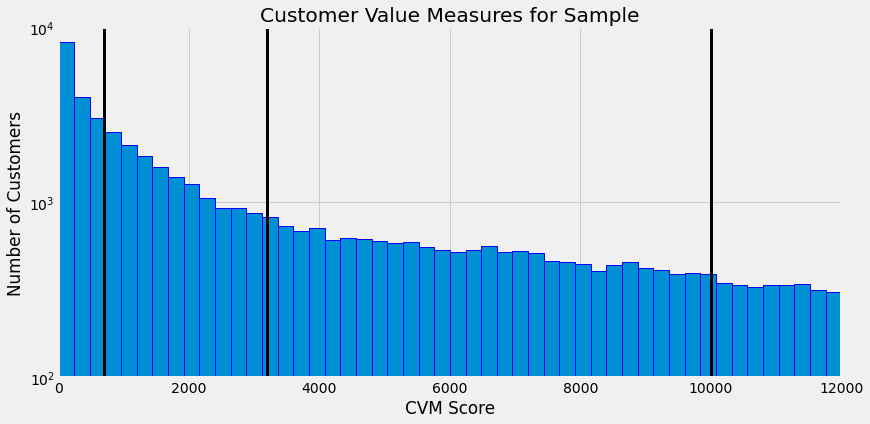

In [56]:
# Visualize CVM quartiles via histogram. 

xhigh = 12000
ylow = 100
yhigh = 10000

q1 = data['CVM'].describe().loc['25%']
q2 = data['CVM'].describe().loc['50%']
q3 = data['CVM'].describe().loc['75%']

# sns.set(font_scale=1.5)
temp = data[data['CVM']<xhigh]
plt.hist(temp['CVM'],bins=50,edgecolor='blue')
plt.yscale('log')
plt.ylim(ylow,yhigh)
plt.xlim(0,xhigh)
plt.plot([q1,q1],[ylow,yhigh],'k-',linewidth=3)
plt.plot([q2,q2],[ylow,yhigh],'k-',linewidth=3)
plt.plot([q3,q3],[ylow,yhigh],'k-',linewidth=3)
plt.title('Customer Value Measures for Sample')
plt.xlabel('CVM Score')
plt.ylabel('Number of Customers')

plt.savefig('CVM Distribution')

## Visualization of CVM Segments in the Chosen Expert Factor Spaces

In [57]:
def create_bins(x):
    if x <= 732: segment =  'red' #red for Value Group D#
    elif x <= 2783:segment = 'yellow' #yellow for Value Group C#
    elif x <= 7816:segment = 'green' #green for Value Group B#
    else: segment = 'orange' #orange for Value Group A#
    return segment
data['CVM_segments'] = data.CVM.apply(create_bins)

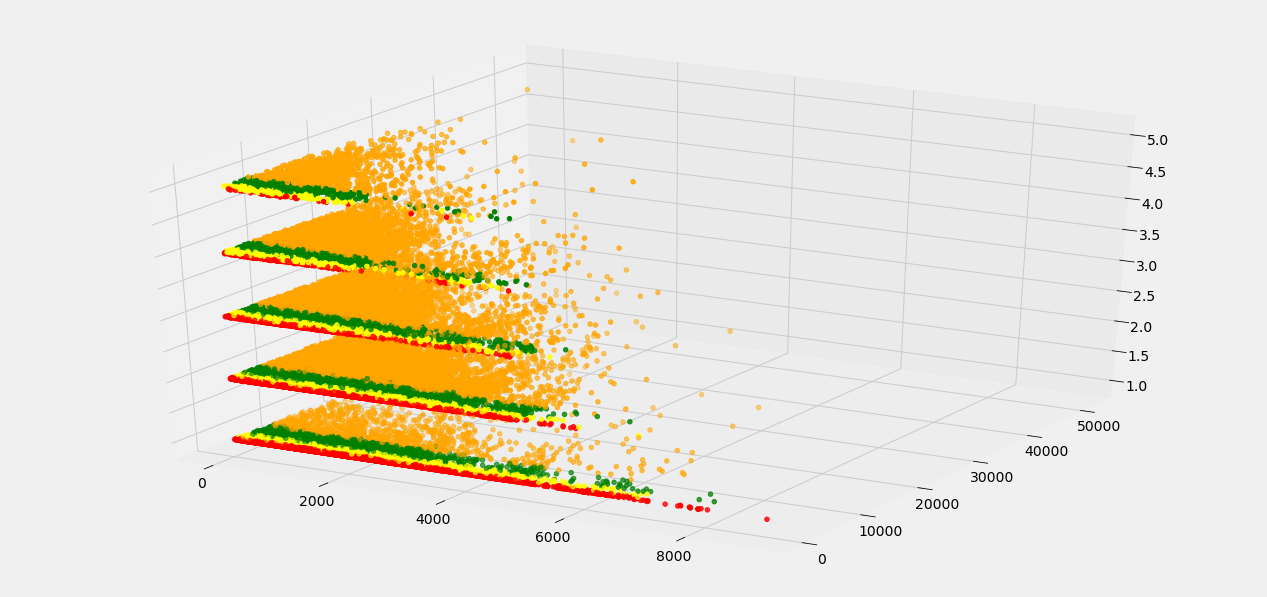

In [58]:
# Expert Factors by CVM segments
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(data['min_distance_to_shops'], data['amount_purchased'], data['shops_used'], c=data['CVM_segments'])

## Visualize CVM segments using Principle Component Analysis

In [59]:
from sklearn.decomposition import PCA
data_subset = data.iloc[:, 1:41].copy().values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
data['pca-three'] = pca_result[:,2]

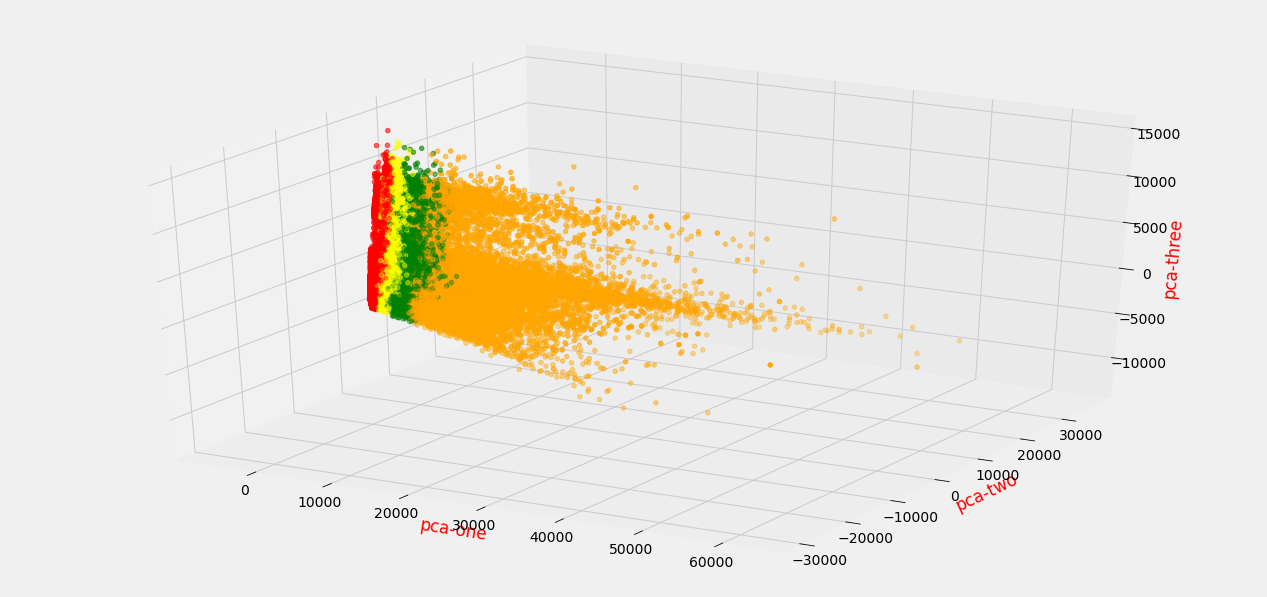

In [60]:
ax = plt.figure(figsize=(20,10)).gca(projection='3d')
ax.scatter(
    xs=data["pca-one"],
    ys=data["pca-two"],
    zs=data["pca-three"],
    c=data["CVM_segments"]
)
ax.set_xlabel('pca-one',color='red')
ax.set_ylabel('pca-two',color='red')
ax.set_zlabel('pca-three',color='red')
plt.show()

# Visualize the customer segments with TSNE

In [61]:
def make_bins(value):
  if value <= 732:
    return 'low'
  if value <= 2783:
    return 'medium-low'
  if value <= 7816:
    return 'medium-high'
  return 'high'
data['CVM_bins'] = data.CVM.apply(make_bins)
features = data.iloc[:, 1:41].copy().values

No handles with labels found to put in legend.


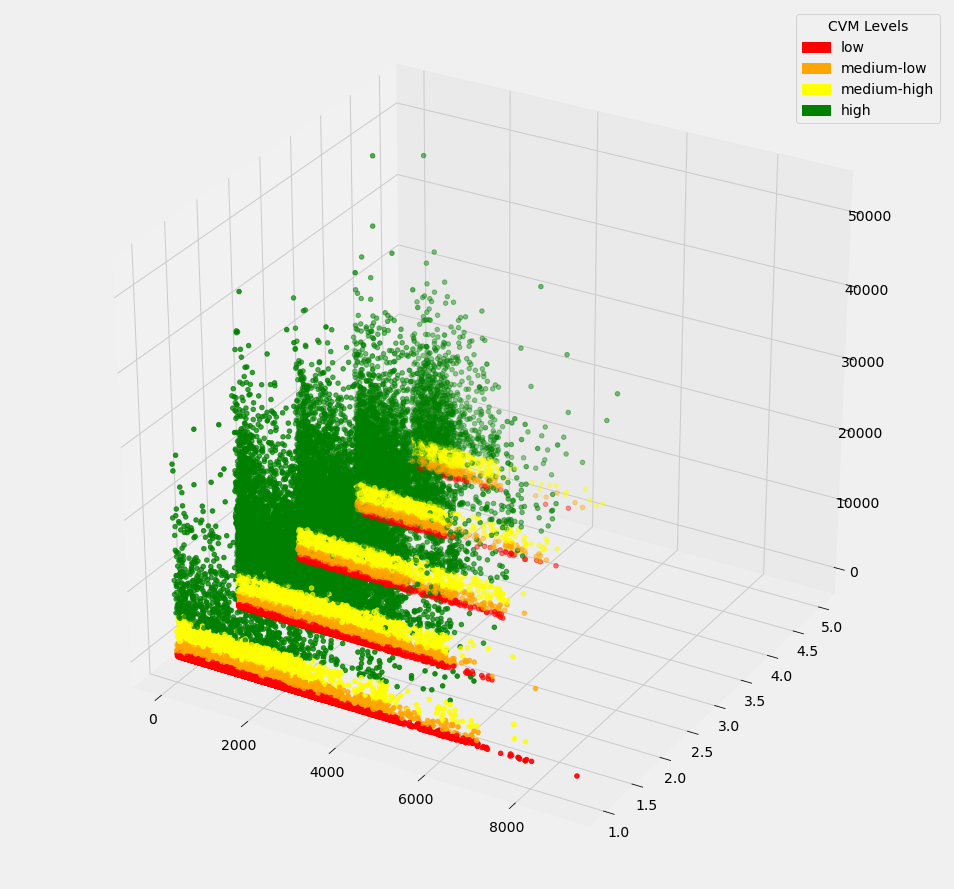

In [62]:
# Expert Variable Space labelled by CVM levels
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
CVM_color_map = {'high': 'green', 'medium-high': 'yellow', 'medium-low': 'orange', 'low': 'red'}
ax.legend()
ax.scatter3D(data['min_distance_to_shops'], data['shops_used'], data['amount_purchased'], c=data['CVM_bins'].map(CVM_color_map))
low = matplotlib.patches.Patch(color='red', label='low')
medium_low = matplotlib.patches.Patch(color='orange', label='medium-low')
medium_high = matplotlib.patches.Patch(color='yellow', label='medium-high')
high = matplotlib.patches.Patch(color='green', label='high')
plt.legend(title='CVM Levels', handles=[low, medium_low, medium_high, high])

In [63]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(features)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 60365 samples in 0.562s...
[t-SNE] Computed neighbors for 60365 samples in 30.289s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60365
[t-SNE] Computed conditional probabilities for sample 2000 / 60365
[t-SNE] Computed conditional probabilities for sample 3000 / 60365
[t-SNE] Computed conditional probabilities for sample 4000 / 60365
[t-SNE] Computed conditional probabilities for sample 5000 / 60365
[t-SNE] Computed conditional probabilities for sample 6000 / 60365
[t-SNE] Computed conditional probabilities for sample 7000 / 60365
[t-SNE] Computed conditional probabilities for sample 8000 / 60365
[t-SNE] Computed conditional probabilities for sample 9000 / 60365
[t-SNE] Computed conditional probabilities for sample 10000 / 60365
[t-SNE] Computed conditional probabilities for sample 11000 / 60365
[t-SNE] Computed conditional probabilities for sample 12000 / 60365
[t-SNE] Computed conditional probabilities for s

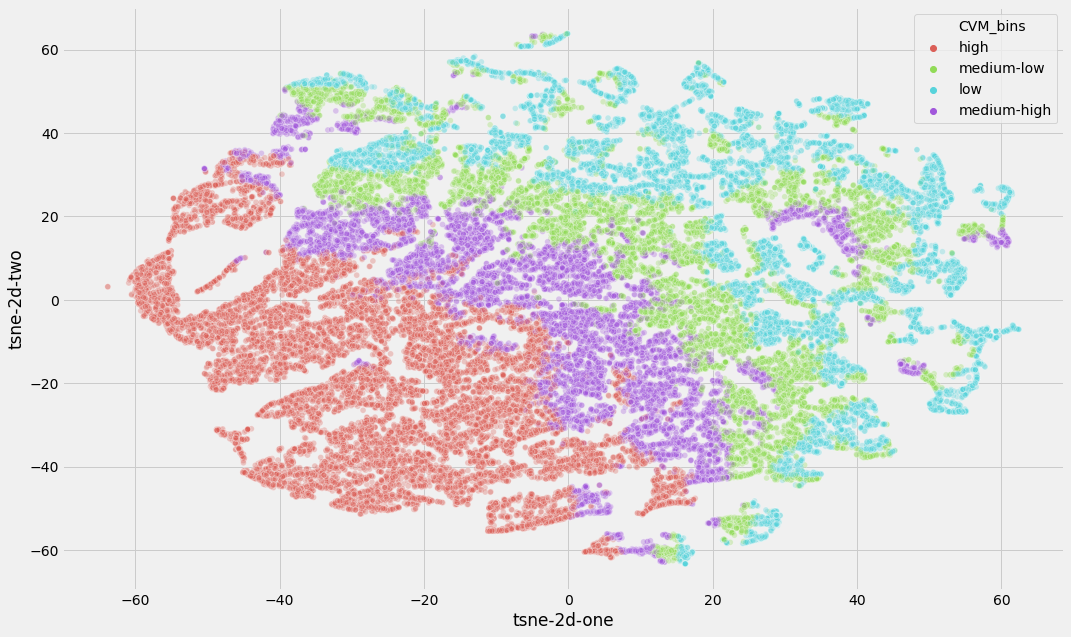

In [64]:
# This plot takes some time to do. Skip it if you want
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="CVM_bins",
    palette=sns.color_palette("hls", 4),
    data=data,
    legend="full",
    alpha=0.3
)

## Searching for analmolous customers

In [65]:
CVM_features = data[['min_distance_to_shops', 'shops_used', 'amount_purchased']].copy()
clf = IsolationForest(random_state=0).fit(CVM_features)
analmoly_scores = clf.score_samples(CVM_features)

In [66]:
k = 30
# top 30 anolmalous scores (smaller the more abnormal)
top_analmolies = np.argsort(analmoly_scores)[:k]
analmoly_customers = data.iloc[top_analmolies, :]

In [67]:
# check anolmaly customer CVMs
# all top anomalous 30 customers are high CVM customers.
# it might be helpful for the shop to manually inspect top anomalous customers to find some patterns
# and provide special treatments 
data[['min_distance_to_shops', 'shops_used', 'amount_purchased', 'CVM', 'CVM_bins']].iloc[top_analmolies, :]

min_distance_to_shops  shops_used  amount_purchased           CVM  \
26897             5783.72950           1         31666.268  49663.518515   
29831             5994.14300           1         24998.285  39207.363306   
2594              3100.33030           5         31517.598  54083.263654   
12539             4898.15230           2         35522.297  58185.512179   
34971             4655.68950           1         33138.887  51977.433003   
16604             3718.26600           5         22821.168  39160.448946   
36625             4893.59030           5         19116.293  32802.789637   
43095             4642.44600           2         28672.201  46965.054231   
19048             4422.11430           1         27051.441  42429.395755   
1743              4746.71440           1         25044.660  39281.735457   
28227             4665.91060           3         25430.890  43423.905251   
34288             2643.23440           5         22038.729  37817.804175   
5426               369.82230           5         45757.370  78518.156186   
8733              4051.30790           2         26287.898  43059.480211   
18755             1724.55810           5         25912.684  44465.393514   
15522             5990.03800           1         15545.437  24379.423032   
30006             6240.22950           1         15566.784  24383.265541   
16441             3140.91330           4         26779.443  45939.786020   
33032             5043.67240           1         20359.140  31932.702318   
7364               185.06888           5         24834.068  42612.565987   
23411             4559.05570           3         23553.162  40216.054223   
36041               67.08136           1         27042.002  42387.906055   
2953               415.35410           5         30721.793  52717.295930   
18067              603.03625           5         32585.652  55916.012144   
53791              426.74530           5         27792.662  47691.386656   
55793             6458.36570           1         13183.354  20675.855307   
18702             3634.27340           2         33054.400  54143.105376   
28213             4657.35740           5         14892.486  25554.420524   
19049             4460.53600           1         21537.500  33778.095326   
29534             3551.06860           3         31178.180  53237.263201   

      CVM_bins  
26897     high  
29831     high  
2594      high  
12539     high  
34971     high  
16604     high  
36625     high  
43095     high  
19048     high  
1743      high  
28227     high  
34288     high  
5426      high  
8733      high  
18755     high  
15522     high  
30006     high  
16441     high  
33032     high  
7364      high  
23411     high  
36041     high  
2953      high  
18067     high  
53791     high  
55793     high  
18702     high  
28213     high  
19049     high  
29534     high

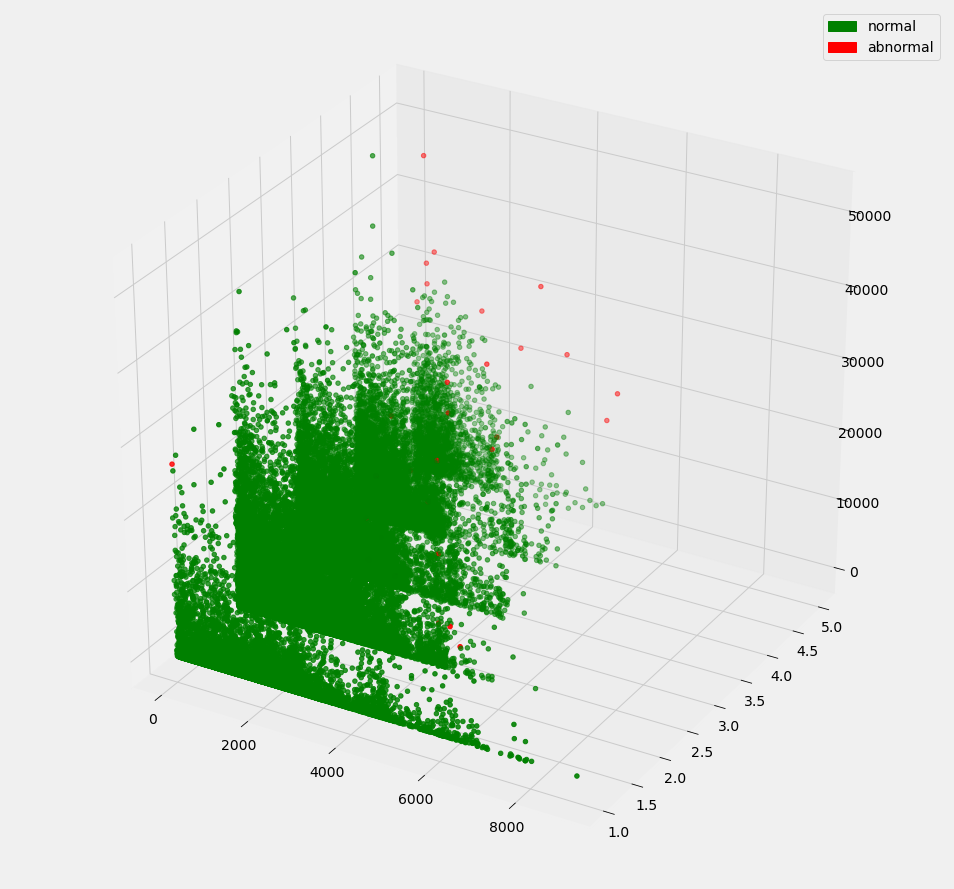

In [68]:
# Anomalous Customers in CVM expert variables space
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
data['anomalous'] = 'green'
data.iloc[top_analmolies, -1] = 'red'
ax.scatter3D(data['min_distance_to_shops'], data['shops_used'], data['amount_purchased'], c=data['anomalous'])
normal = matplotlib.patches.Patch(color='green', label='normal')
abnormal = matplotlib.patches.Patch(color='red', label='abnormal')
plt.legend(handles=[normal, abnormal])

## Examine the 4 CVM groups

In [69]:
# set the amount_purchased data into four different groups.
len(data['amount_purchased'])
category = list(data['amount_purchased'])
new = []
list(data['amount_purchased'])[1]

7820.219

In [70]:
def numTocategory(values):
    for i in list(range(len(values)-1)):
        if values[i] <= 741: new.append('one')
        elif values[i] <= 2783: new.append('two')
        elif values[i] <= 7816: new.append('three')
        else: new.append('four')

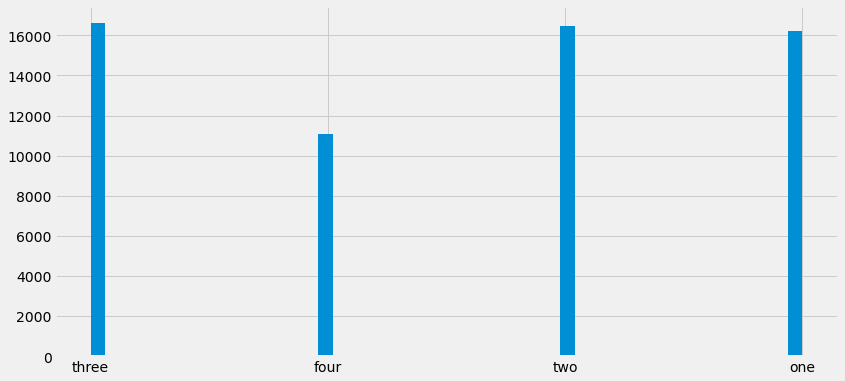

In [71]:
numTocategory(category)
plt.hist(new, bins = 50)
plt.savefig('four_segment_of_CVM.png')

In [72]:
new_data = pd.DataFrame()
new_data['purchased_amount_category'] = new
new_data['shops_used'] = temp['shops_used']
new_data['unique_products_purchased'] = temp['unique_products_purchased']
new_data['min_distance_to_shops'] = temp['min_distance_to_shops']
new_data['amount_purchases'] = temp['amount_purchased']
new_data

purchased_amount_category  shops_used  unique_products_purchased  \
0                         three         NaN                        NaN   
1                          four         NaN                        NaN   
2                           two         4.0                      234.0   
3                           two         4.0                      208.0   
4                           one         2.0                       10.0   
...                         ...         ...                        ...   
60359                       one         1.0                      145.0   
60360                       one         2.0                      118.0   
60361                       two         1.0                      266.0   
60362                       one         1.0                        8.0   
60363                       one         1.0                       52.0   

       min_distance_to_shops  amount_purchases  
0                        NaN               NaN  
1                        NaN               NaN  
2                  754.29560          1788.613  
3                  362.79178          1679.520  
4                  275.46753            17.922  
...                      ...               ...  
60359             1280.16220           507.751  
60360             2816.33200           534.747  
60361             1168.94510          2209.502  
60362              938.86285            24.102  
60363             1727.25200           442.016  

[60364 rows x 5 columns]

In [73]:
one_data = new_data[new_data['purchased_amount_category'] == 'one']
two_data = new_data[new_data['purchased_amount_category'] == 'two']
three_data = new_data[new_data['purchased_amount_category'] == 'three']
four_data = new_data[new_data['purchased_amount_category'] == 'four']

In [74]:
# customer segment one data
one_data.describe()

shops_used  unique_products_purchased  min_distance_to_shops  \
count  16196.000000               16196.000000           16196.000000   
mean       1.762349                  63.436095            1672.560570   
std        0.819501                  48.407070            1160.203924   
min        1.000000                   1.000000               6.642472   
25%        1.000000                  21.000000             751.421400   
50%        2.000000                  55.000000            1551.213250   
75%        2.000000                  99.000000            2265.212900   
max        5.000000                 221.000000            9004.164000   

       amount_purchases  
count      16196.000000  
mean         271.576942  
std          217.695781  
min            0.212000  
25%           75.356500  
50%          221.675000  
75%          444.680000  
max          740.978000

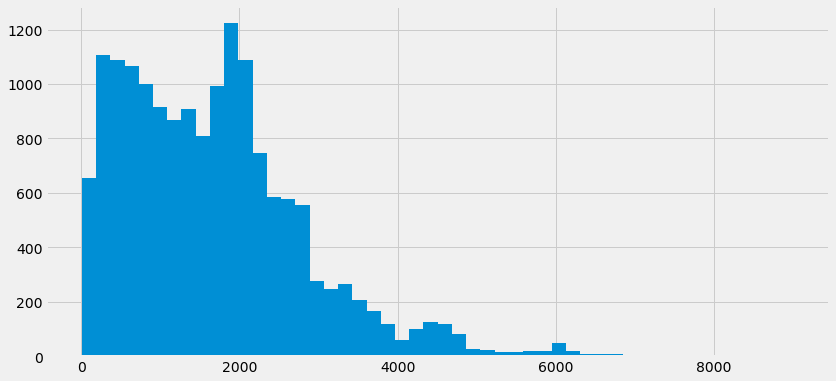

In [75]:
plt.hist(one_data['min_distance_to_shops'], bins = 50)
plt.savefig('one_min_distance_to_shops.png')

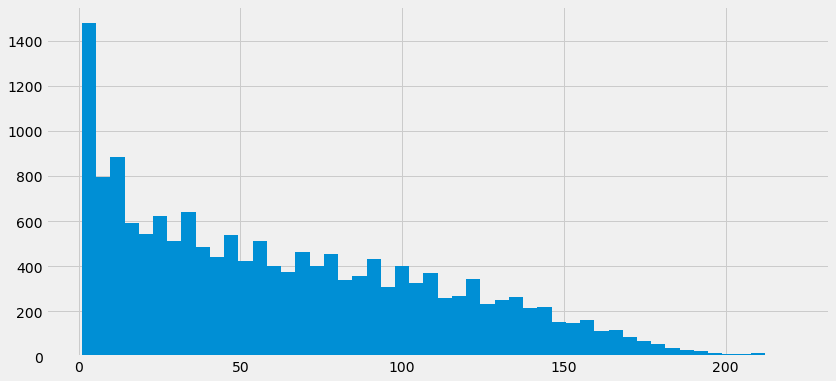

In [76]:
plt.hist(one_data['unique_products_purchased'], bins = 50)
plt.savefig('one_unique_products_purchased.png')

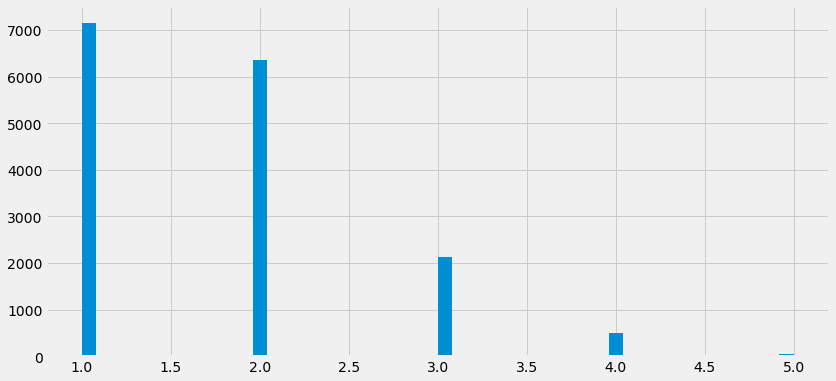

In [77]:
plt.hist(one_data['shops_used'], bins = 50)
plt.savefig('one_shops_used.png')

In [78]:
# customer segment two data
two_data.describe()

shops_used  unique_products_purchased  min_distance_to_shops  \
count  16477.000000               16477.000000           16477.000000   
mean       2.410936                 241.884809            1436.429091   
std        0.954556                  77.141101            1021.113292   
min        1.000000                   1.000000               6.642472   
25%        2.000000                 186.000000             628.401800   
50%        2.000000                 238.000000            1265.737400   
75%        3.000000                 296.000000            1990.502200   
max        5.000000                 506.000000            7884.010000   

       amount_purchases  
count      16477.000000  
mean        1625.455519  
std          585.211028  
min          741.125000  
25%         1109.099000  
50%         1553.159000  
75%         2111.045000  
max         2782.720000

In [79]:
# customer segment three data
three_data.describe()

shops_used  unique_products_purchased  min_distance_to_shops  \
count  15372.000000               15372.000000           15372.000000   
mean       2.658145                 441.263271            1275.087904   
std        0.977615                  97.333369             960.296641   
min        1.000000                  92.000000               6.642472   
25%        2.000000                 375.000000             524.616325   
50%        3.000000                 438.000000            1067.855800   
75%        3.000000                 507.000000            1846.117250   
max        5.000000                 834.000000            7632.097700   

       amount_purchases  
count      15372.000000  
mean        4662.114131  
std         1269.648355  
min         2783.020000  
25%         3547.385750  
50%         4484.408500  
75%         5671.527250  
max         7815.886000

In [80]:
# customer segment four data
four_data.describe()

shops_used  unique_products_purchased  min_distance_to_shops  \
count   23.000000                  23.000000              23.000000   
mean     1.521739                 289.391304            1632.817227   
std      0.730477                  61.779475            1601.348730   
min      1.000000                 119.000000              79.150215   
25%      1.000000                 265.000000             372.626175   
50%      1.000000                 295.000000            1204.426100   
75%      2.000000                 316.500000            2498.841900   
max      3.000000                 410.000000            5901.982400   

       amount_purchases  
count         23.000000  
mean        8219.681522  
std          280.045400  
min         7822.446300  
25%         8088.743000  
50%         8156.654000  
75%         8305.086500  
max         8912.873000

In [ ]:
print('duration: ', datetime.now() - start_time)